In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

In [5]:
# Create a table object for  the `Measurement` and `Station` tables
# use 'autoload' and 'autoload_with' to define the columns from the table. 
Measurement_table = Table('Measurement', metadata, autoload=True, autoload_with=engine)
Station_table = Table('Station', metadata, autoload=True, autoload_with=engine)

In [6]:
# Get the column names using the 'column.keys()' methods on the table object. 
print(Measurement_table.columns.keys())
print(Station_table.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


## D1: Determine the Summary Statistics for June

In [7]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
print(session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).statement)
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()



SELECT measurement.tobs 
FROM measurement 
WHERE EXTRACT(month FROM measurement.date) = :param_1


In [8]:
# 2. Convert the June temperatures to a list.
Jun_results = list(np.ravel(results))
Jun_results

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [19]:
import pandas as pd
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns = ['June Temp'])
df_jun = df
df

,June Temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [10]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [11]:
# 5. Return to your challenge instructions to compare your summary statistics
# Getting data for analysis 
bins = [0, 60, 70, 80, 90, 100]

# Create the names for the four bins
group_names = ["<=60", ">60 and <= 70",  ">70 and <=80",  ">80 and <=90",  ">90 and <=100" ]
df["Grade"] = pd.cut(df["June Temp"], bins, labels=group_names)
df_june = df.groupby("Grade")
df_june.describe()

June Temp                                                   
                  count       mean       std   min   25%   50%   75%   max
Grade                                                                     
<=60                0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN
>60 and <= 70     171.0  69.076023  1.198066  64.0  69.0  69.0  70.0  70.0
>70 and <=80     1485.0  75.426263  2.547814  71.0  73.0  76.0  78.0  80.0
>80 and <=90       44.0  81.477273  0.952076  81.0  81.0  81.0  82.0  85.0
>90 and <=100       0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN

## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
print(session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).statement)
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


SELECT measurement.tobs 
FROM measurement 
WHERE EXTRACT(month FROM measurement.date) = :param_1


In [13]:
# 7. Convert the December temperatures to a list.
Dec_results = list(np.ravel(results))
Dec_results

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [20]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
import pandas as pd
df = pd.DataFrame(Dec_results, columns = ['December Temp'])
df_dec = df
df

,December Temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [16]:
# 10. Return to your challenge instructions to compare your summary statistics
bins = [0, 60, 70, 80, 90, 100]

# Create the names for the four bins
group_names = ["<=60", ">60 and <= 70",  ">70 and <=80",  ">80 and <=90",  ">90 and <=100" ]
df["Grade"] = pd.cut(df["December Temp"], bins, labels=group_names)
df_dec = df.groupby("Grade")
df_dec.describe()

December Temp                                                \
                      count       mean       std   min   25%   50%    75%   
Grade                                                                       
<=60                    9.0  58.111111  1.691482  56.0  57.0  58.0  60.00   
>60 and <= 70         621.0  67.669887  2.256649  61.0  66.0  68.0  69.00   
>70 and <=80          883.0  73.496036  2.061068  71.0  72.0  73.0  75.00   
>80 and <=90            4.0  81.750000  0.957427  81.0  81.0  81.5  82.25   
>90 and <=100           0.0        NaN       NaN   NaN   NaN   NaN    NaN   

                     
                max  
Grade                
<=60           60.0  
>60 and <= 70  70.0  
>70 and <=80   80.0  
>80 and <=90   83.0  
>90 and <=100   NaN

<AxesSubplot:ylabel='Frequency'>

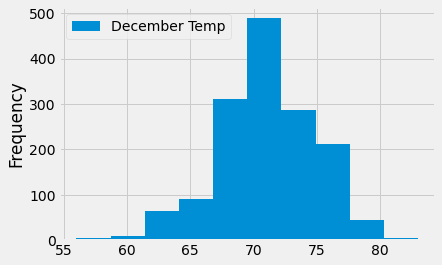

In [27]:
df_dec.plot.hist()

In [17]:
df_june.describe()

June Temp                                                   
                  count       mean       std   min   25%   50%   75%   max
Grade                                                                     
<=60                0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN
>60 and <= 70     171.0  69.076023  1.198066  64.0  69.0  69.0  70.0  70.0
>70 and <=80     1485.0  75.426263  2.547814  71.0  73.0  76.0  78.0  80.0
>80 and <=90       44.0  81.477273  0.952076  81.0  81.0  81.0  82.0  85.0
>90 and <=100       0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN

<AxesSubplot:ylabel='Frequency'>

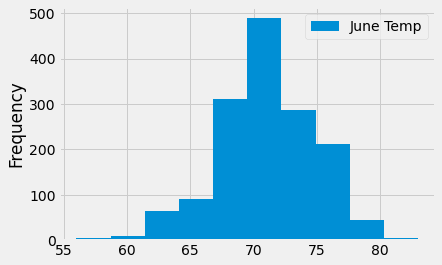

In [28]:
df_jun.plot.hist()